In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Heart (2).csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart_Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df['FBS over 120'].value_counts()

0    230
1     40
Name: FBS over 120, dtype: int64

In [6]:
df['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [7]:
df['Thallium'].value_counts()

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [8]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      270 non-null    int64  
 1   sex                      270 non-null    int64  
 2   chest_pain_type          270 non-null    int64  
 3   resting_blood_pressure   270 non-null    int64  
 4   cholesterol              270 non-null    int64  
 5   fasting_blood_sugar      270 non-null    int64  
 6   rest_ecg                 270 non-null    int64  
 7   max_heart_rate_achieved  270 non-null    int64  
 8   exercise_induced_angina  270 non-null    int64  
 9   st_depression            270 non-null    float64
 10  st_slope                 270 non-null    int64  
 11  num_major_vessels        270 non-null    int64  
 12  thalassemia              270 non-null    int64  
 13  condition                270 non-null    object 
dtypes: float64(1), int64(12), 

In [10]:
df['chest_pain_type'][df['chest_pain_type']==1]='typical angina'
df['chest_pain_type'][df['chest_pain_type']==2]='atypical agina'
df['chest_pain_type'][df['chest_pain_type']==3]='nonanginal pain'
df['chest_pain_type'][df['chest_pain_type']==4]='asymptomatic'


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,70,1,asymptomatic,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,nonanginal pain,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,atypical agina,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,asymptomatic,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,atypical agina,120,269,0,2,121,1,0.2,1,1,3,Absence


In [12]:
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

In [13]:
df['rest_ecg'] = df['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

In [14]:
df['rest_ecg'].value_counts()

left_ventricular_hypertrophy    137
normal                          131
ST-T_wave_abnormality             2
Name: rest_ecg, dtype: int64

In [15]:
df['st_slope'].value_counts()

1    130
2    122
3     18
Name: st_slope, dtype: int64

In [16]:
df['st_slope'][df['st_slope']==1]='Upslpoing'
df['st_slope'][df['st_slope']==1]='flat'
df['st_slope'][df['st_slope']==1]='downsloping'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [17]:
df['sex']= df.sex.apply(lambda x:'male' if x==1 else 'female')

In [18]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,70,male,asymptomatic,130,322,less_than_120mg/ml,left_ventricular_hypertrophy,109,0,2.4,2,3,3,Presence
1,67,female,nonanginal pain,115,564,less_than_120mg/ml,left_ventricular_hypertrophy,160,0,1.6,2,0,7,Absence
2,57,male,atypical agina,124,261,less_than_120mg/ml,normal,141,0,0.3,Upslpoing,0,7,Presence
3,64,male,asymptomatic,128,263,less_than_120mg/ml,normal,105,1,0.2,2,1,7,Absence
4,74,female,atypical agina,120,269,less_than_120mg/ml,left_ventricular_hypertrophy,121,1,0.2,Upslpoing,1,3,Absence


In [19]:
df.describe(include=[np.number])

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,thalassemia
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,0.329630,1.05000,0.670370,4.696296
std,9.109067,17.861608,51.686237,23.165717,0.470952,1.14521,0.943896,1.940659
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.00000,0.000000,3.000000
25%,48.000000,120.000000,213.000000,133.000000,0.000000,0.00000,0.000000,3.000000
50%,55.000000,130.000000,245.000000,153.500000,0.000000,0.80000,0.000000,3.000000
75%,61.000000,140.000000,280.000000,166.000000,1.000000,1.60000,1.000000,7.000000
max,77.000000,200.000000,564.000000,202.000000,1.000000,6.20000,3.000000,7.000000


In [20]:
df.describe(include=[np.object])

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,st_slope,condition
count,270,270,270,270,270,270
unique,2,4,2,3,3,2
top,male,asymptomatic,less_than_120mg/ml,left_ventricular_hypertrophy,Upslpoing,Absence
freq,183,129,230,137,130,150


In [21]:
#df['condition'] = df['condition'].replace(['Presence','Absence'],['0','1'])



#df['chest_pain_type'] = df['chest_pain_type'].replace(['typical_angina','atypical_Angina','non_anginal_pain','asymptomatic'],['0','1','2','3'])

In [22]:
#df['chest_pain_type'].astype('float')

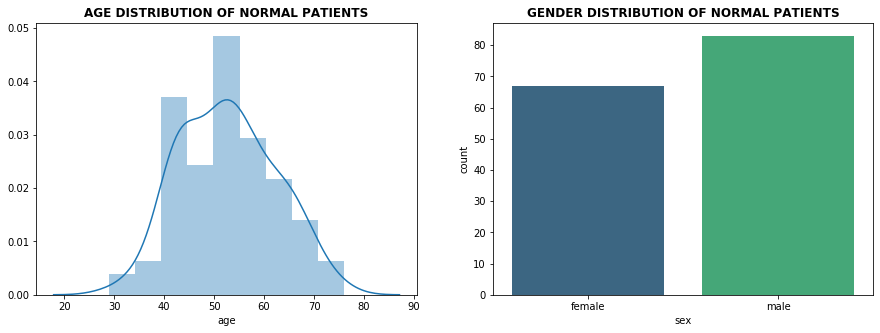

In [23]:
age_nt=df[df['condition']=='Presence']
age_nor=df[df['condition']=='Absence']

fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(age_nor['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=12,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(age_nor['sex'],palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS',fontsize=12,weight='bold')
plt.show()


Text(0.5, 1.0, 'GENDER DISTRIBUTION OF HEART DISEASE PATIENTS')

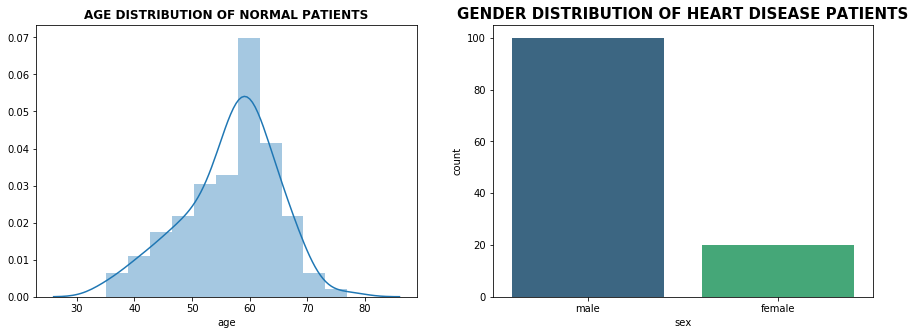

In [24]:
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(age_nt['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS',fontsize=12,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(age_nt['sex'],palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15,weight='bold')

ValueError: could not convert string to float: 'asymptomatic'

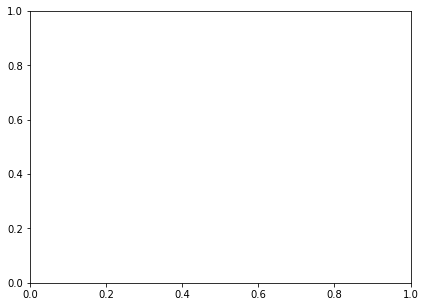

In [25]:
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(df['chest_pain_type'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=12,weight='bold')


In [ ]:
fig.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(df['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS',fontsize=15,weight='bold')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test,train_test_split=(x,y,train_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import SVC
model=SVC()

In [ ]:
model.fit(x_train,y_train)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,prdiction))